<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

## Prepare Environment

Jupyter notebook housekeeping

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline


### Install local canswim package

In [2]:
# pip install -r requirements.txt
# !pip install -e ./

import sys
!{sys.executable} -m pip install -e ./


Obtaining file:///home/ivelin/canswim
  Preparing metadata (setup.py) ... done
  Using cached lightning-2.1.3-py3-none-any.whl.metadata (56 kB)
Using cached lightning-2.1.3-py3-none-any.whl (2.0 MB)
  Attempting uninstall: canswim
    Found existing installation: canswim 0.0.1
    Uninstalling canswim-0.0.1:
      Successfully uninstalled canswim-0.0.1
  Running setup.py develop for canswim


## Prepare Model

In [3]:
from canswim.model import CanswimModel

canswim_model = CanswimModel()

canswim_model.load_data()


n_test_range_days: 630
min_samples: 1890
n_stocks:  50
n_epochs:  10
Configuring CUDA GPU
earnings_loaded_df.columns Index(['symbol', 'date', 'eps', 'epsEstimated', 'time', 'revenue',
       'revenueEstimated', 'updatedFromDate', 'fiscalDateEnding'],
      dtype='object')


In [4]:
# canswim_model.covariates.load_past_covariates()
# canswim_model.covariates.load_future_covariates()

In [5]:

def prepare_data():
    canswim_model.prepare_data()
    canswim_model.plot_splits()
    canswim_model.plot_seasonality()



Training loop stock subset: ['CCL', 'PEB', 'AX', 'RIOT', 'INSE', 'URBN', 'CDNS', 'SCHW', 'PFE', 'FGEN', 'WFC', 'DDD', 'LMB', 'DORM', 'FCNCA', 'PRPL', 'WVE', 'FLS', 'CLB', 'PRFT', 'OFG', 'NUS', 'EGLE', 'TXN', 'JOE', 'FLR', 'TYL', 'NEXT', 'HDSN', 'LRN', 'TSLX', 'NIC', 'VZ', 'OC', 'UPS', 'LKFN', 'UNIT', 'GEF', 'UTL', 'DHT', 'LIN', 'BHB', 'UNTY', 'FLIC', 'DECK', 'EVH', 'IDT', 'SMP', 'TEL', 'HCI']
Preparing ticker series for 50 stocks.
Ticker series dict created.
Filled missing values in ticker series.
Aligned ticker series dict with train start date.
Ticker series prepared.
Single target column selected: Close
Preparing univariate target series: Close
self.earnings_loaded_df.columns Index(['eps', 'epsEstimated', 'time', 'revenue', 'revenueEstimated',
       'updatedFromDate', 'fiscalDateEnding'],
      dtype='object')
Skipping UPS due to error:  "['UPS'] not in index"
Skipping UPS covariates stack due to error:  'UPS'
No analyst estimates available for TYL
Added holidays to ticker series.


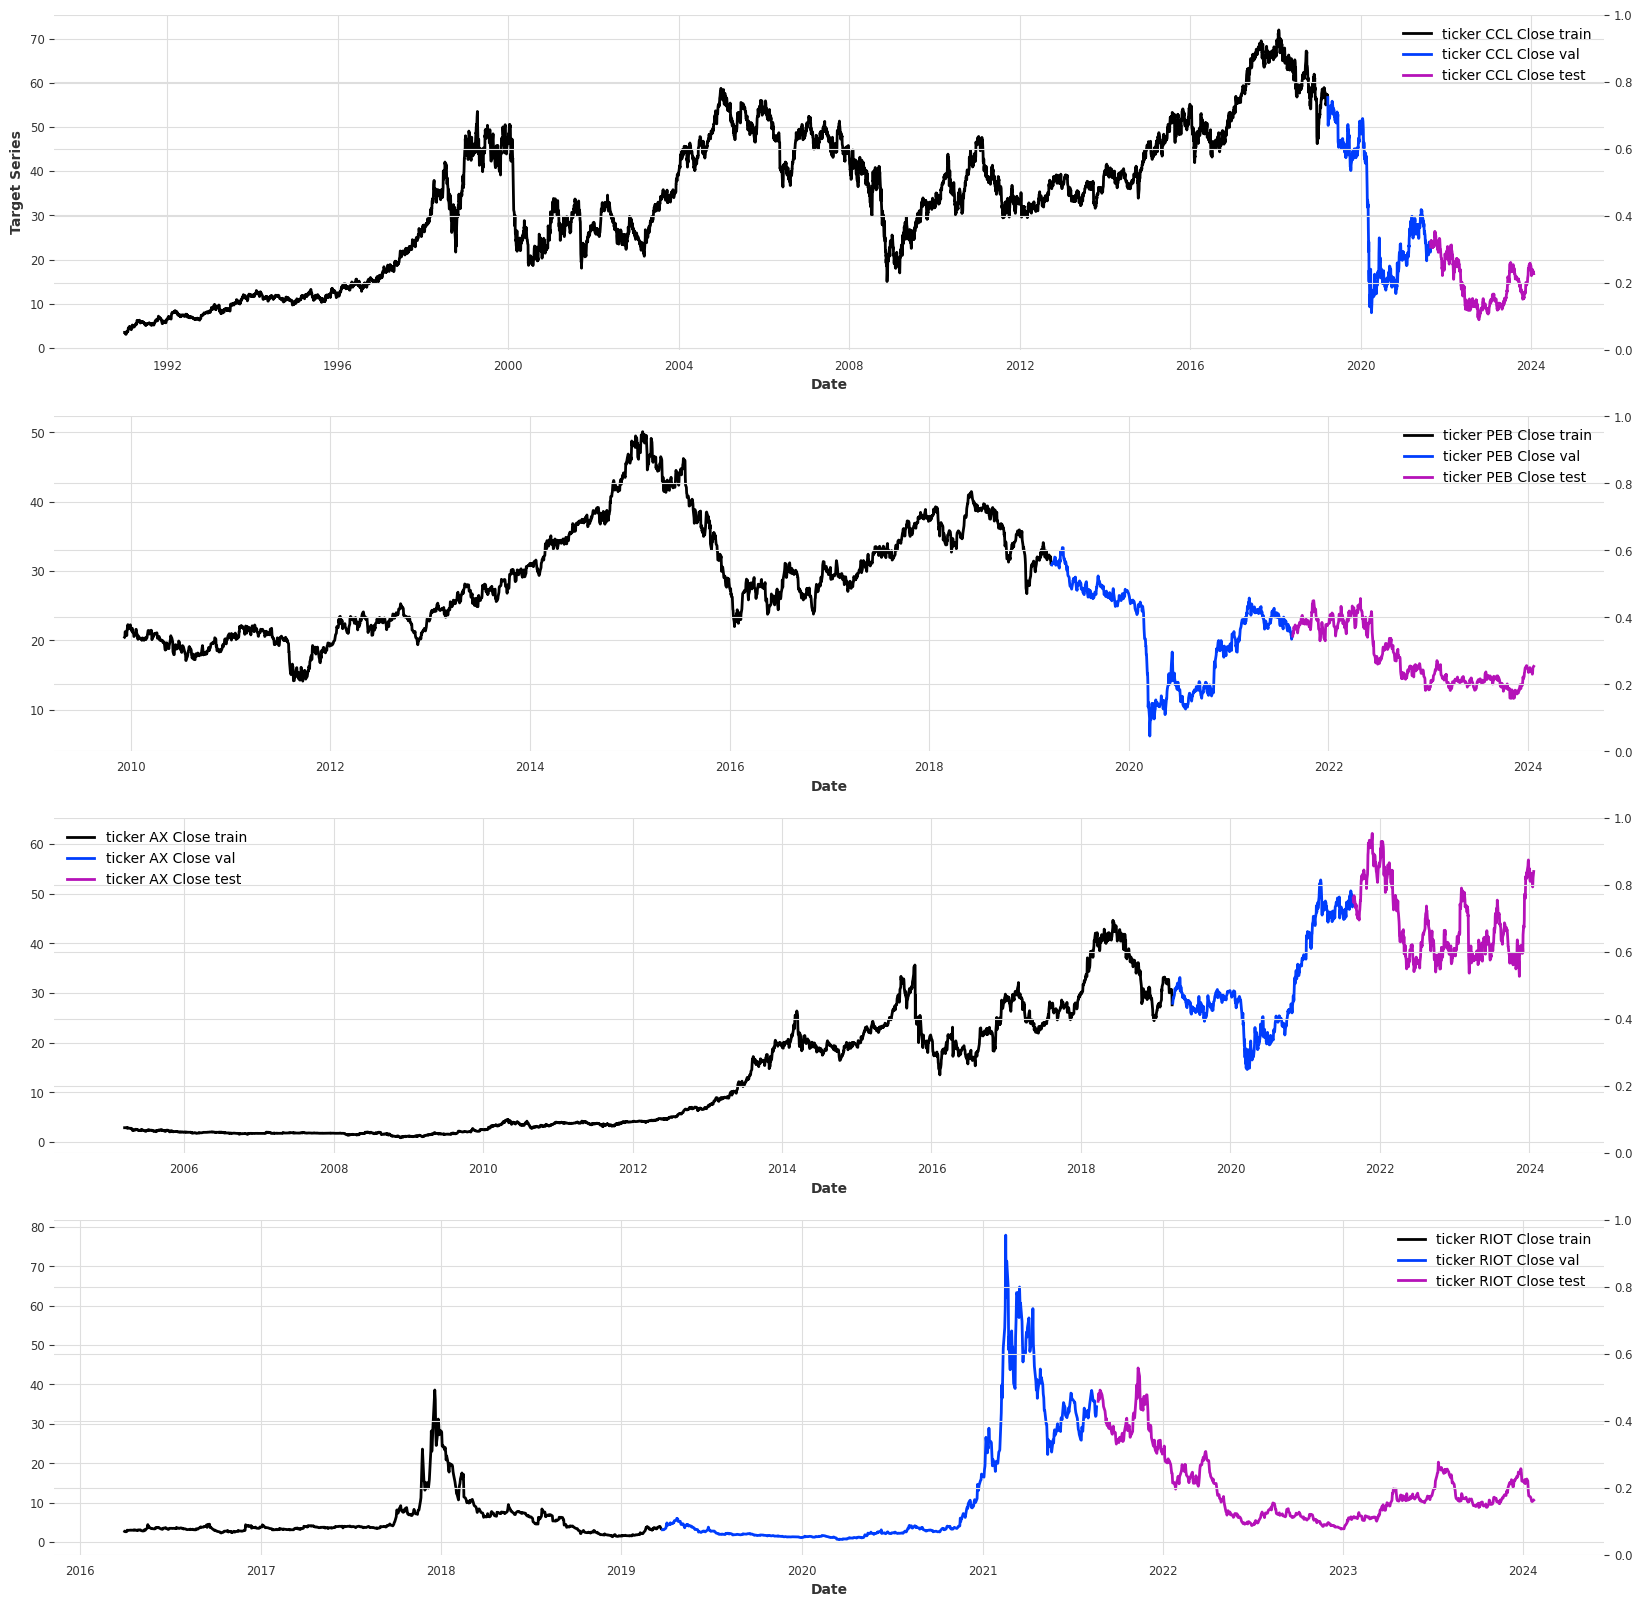

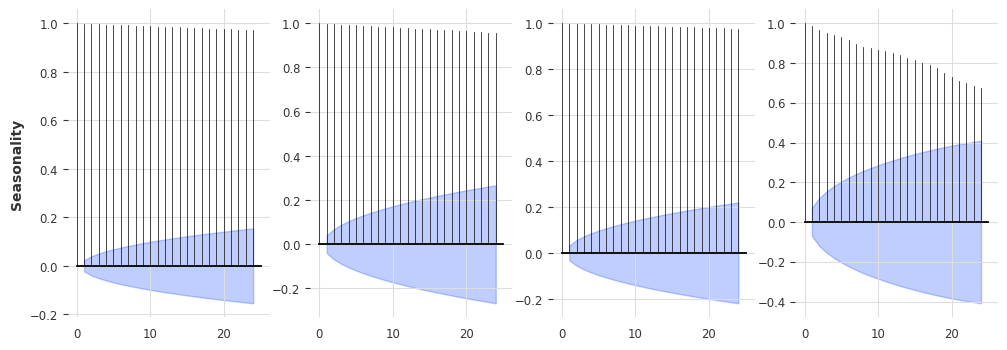

In [6]:
prepare_data()

In [7]:
canswim_model.stock_tickers

['CCL',
 'PEB',
 'AX',
 'RIOT',
 'INSE',
 'URBN',
 'CDNS',
 'SCHW',
 'PFE',
 'FGEN',
 'WFC',
 'DDD',
 'LMB',
 'DORM',
 'FCNCA',
 'PRPL',
 'WVE',
 'FLS',
 'CLB',
 'PRFT',
 'OFG',
 'NUS',
 'EGLE',
 'TXN',
 'JOE',
 'FLR',
 'TYL',
 'NEXT',
 'HDSN',
 'LRN',
 'TSLX',
 'NIC',
 'VZ',
 'OC',
 'UPS',
 'LKFN',
 'UNIT',
 'GEF',
 'UTL',
 'DHT',
 'LIN',
 'BHB',
 'UNTY',
 'FLIC',
 'DECK',
 'EVH',
 'IDT',
 'SMP',
 'TEL',
 'HCI']

In [8]:
# canswim_model.targets.target_series['GHC'].pd_dataframe()

In [9]:
# future_covs = canswim_model.covariates.future_covariates['GHC'].pd_dataframe().tail(500)
# past_covs = canswim_model.covariates.past_covariates['GHC'].pd_dataframe().tail(500)

## Find optimal hyper parameters

In [21]:
canswim_model.find_model()


[I 2024-01-26 21:00:01,346] A new study created in memory with name: no-name-ad72f52e-5feb-497d-84e0-5f477a63354d


Creating a new model


number of `past_covariates` features is <= `temporal_width_past`, leading to feature expansion.number of covariates: 1, `temporal_width_past=4`.
[W 2024-01-26 21:00:38,719] Trial 0 failed with parameters: {'input_chunk_length': 504, 'output_chunk_length': 47, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 112, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.04705227736114835} because of the following error: ValueError('Expected a parent').
Traceback (most recent call last):
  File "/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/home/ivelin/canswim/src/canswim/model.py", line 671, in _optuna_objective
    model.fit(
  File "/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/darts/utils/torch.py", line 112, in decora

ValueError: Expected a parent

In [ ]:
# if a model has not been selected and saved yet
# run a hyper parameter search
# otherwise load saved model and continue training
if not canswim_model.load_model():
    # look for an optimal model configuration
    if canswim_model.find_model():
        # if one is found, save it for further training
        canswim_model.save_model()

[I 2024-01-26 20:31:27,992] A new study created in memory with name: no-name-d0e6d27d-35ac-475e-8a5d-61cf749cb23e
[W 2024-01-26 20:31:27,993] Trial 0 failed with parameters: {'input_chunk_length': 252, 'output_chunk_length': 62, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'temporal_decoder_hidden': 48, 'dropout': 0.0, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 3.184405494623689e-05} because of the following error: ImportError("Tried to import 'lightning' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'lightning'.").
Traceback (most recent call last):
  File "/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/optuna/integration/pytorch_lightning.py", line 16, in <module>
    import lightning.pytorch as pl
ModuleNotFoundError: No module named 'lightning'

The above exception was the direct cause of the following exception:

Traceback (most recent cal

Unable to find or load a saved model. Error: 
 [Errno 2] No such file or directory: 'data/canswim_model.pt'


ImportError: Tried to import 'lightning' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'lightning'.

## Train model

### Run model training loop

In [ ]:

# train loop
for i in range(10):
    # align all data series for training
    canswim_model.train()
    # save model checkpoint
    canswim_model.save()
    # quick test progress at modelcheckpoing
    canswim_model.test()
    canswim_model.plot_test_results()    
    # thorough backtest of model checkpoint
    backtest, test_error = canswim_model.backtest()        
    print(f"Backtest Quantile Loss = {test_error}")
    canswim_model.plot_backtest_results(backtest)    
    # prepare next sample subset
    prepare_data()
